# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [30]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkplot

ERROR:root:The 'ast_node_interactivity' trait of a ZMQInteractiveShell instance must be any of ['all', 'last', 'last_expr', 'none'], but a value of 'last_expr_or_assign' <class 'str'> was specified.


In [45]:
class Subclass(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: 
        hypo: 
        """
        for i in data:
            if i == 'B':
                like = hypo/3
            elif i == 'G':
                like = (3-hypo)/3
        return like

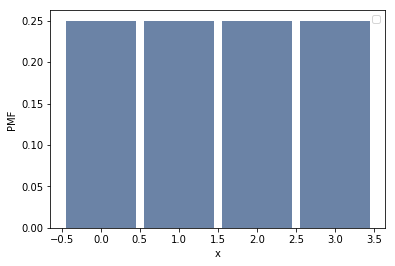

In [46]:
prior = Subclass([0,1,2,3])
thinkplot.Hist(prior)
thinkplot.Config(xlabel='x', ylabel='PMF')

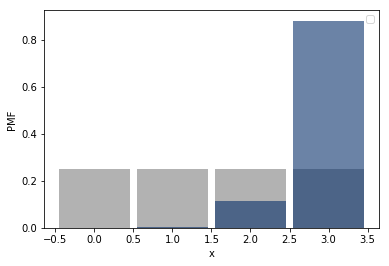

In [47]:
jacob = prior.Copy()
for x in 5*'B' + 0 *'G':
    jacob.Update(x)
thinkplot.Hist(prior, color='gray')
thinkplot.Hist(jacob)
thinkplot.Config(xlabel='x', ylabel='PMF')

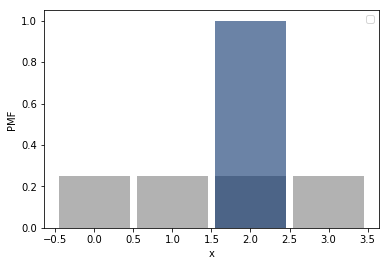

In [48]:
emily = prior.Copy()
for x in 17*'B' + 3 *'G':
    emily.Update(x)
thinkplot.Hist(prior, color='gray')
thinkplot.Hist(emily)
thinkplot.Config(xlabel='x', ylabel='PMF')

In [56]:
# for Bnext multiply the proportion of the blue by the chance of picking that urn and then add them all together
# law of total probability IMPORTANT
# sum of P(H)P(Bnext|H) for all H 
# as long as mutually exclusive and collectively exhaustive
Bnext = 0
for hypo, prob in jacob.Items():
    piece = hypo/3 * prob
    Bnext += piece 
print(Bnext)

0.9589371980676328


In [60]:
def Bluenext(posterior):
    Bnext = 0
    for hypo, prob in posterior.Items():
        piece = hypo/3 * prob
        Bnext += piece 
    print(Bnext)

In [61]:
Bluenext(emily)

0.666646322856271


In [62]:
emily.Update('B')
jacob.Update('B')
Bluenext(emily)
Bluenext(jacob)

0.6666564944510563
0.9722921914357681


In [63]:
emily.Update('G')
jacob.Update('G')
Bluenext(emily)
Bluenext(jacob)

0.666646322856271
0.6565656565656565
